In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
nba_salaries= pd.read_csv("salaries_1985to2018.csv")
nba_players=pd.read_csv("players.csv")



In [70]:
nba_salaries.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [71]:
nba_players.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [72]:
nba_players.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [73]:
nba_players=nba_players.dropna(how = 'any')

In [74]:
nba_players=nba_players.drop(columns=['_id', 'birthPlace', 'college', 'highSchool', 'birthDate',"shoots"])

In [75]:
nba_players = nba_players[nba_players.draft_year >= '2000']
nba_players.head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_team,draft_year,height,name,position,weight
10,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3,60th overall,2nd round,Detroit Pistons,2005,6-5,Alex Acker,Shooting Guard,185lb
14,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,37th overall,2nd round,Toronto Raptors,2012,6-7,Quincy Acy,Power Forward and Small Forward,240lb
18,0.2,53.4,0.0,64.3,73,11.8,2.5,1.2,0.8,53.4,54th overall,2nd round,New Jersey Nets,2006,6-4,Hassan Adams,Shooting Guard,220lb
20,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,22nd overall,1st round,Memphis Grizzlies,2014,6-5,Jordan Adams,Shooting Guard,209lb
22,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,12th overall,1st round,Oklahoma City Thunder,2013,7-0,Steven Adams,Center,265lb


In [76]:
nba_players=nba_players[['name','position', 'height', 'weight', 'draft_year', 'draft_pick', 'draft_round', 'draft_team'
           ,'career_AST', 'career_FG%', 'career_FG3%','career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%']]
nba_players.head()

,name,position,height,weight,draft_year,draft_pick,draft_round,draft_team,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
10,Alex Acker,Shooting Guard,6-5,185lb,2005,60th overall,2nd round,Detroit Pistons,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3
14,Quincy Acy,Power Forward and Small Forward,6-7,240lb,2012,37th overall,2nd round,Toronto Raptors,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3
18,Hassan Adams,Shooting Guard,6-4,220lb,2006,54th overall,2nd round,New Jersey Nets,0.2,53.4,0.0,64.3,73,11.8,2.5,1.2,0.8,53.4
20,Jordan Adams,Shooting Guard,6-5,209lb,2014,22nd overall,1st round,Memphis Grizzlies,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7
22,Steven Adams,Center,7-0,265lb,2013,12th overall,1st round,Oklahoma City Thunder,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8


In [77]:
nba_players.describe()

,career_AST,career_G,career_PTS
count,779.000000,779.000000,779.000000
mean,1.520282,298.243902,7.142105
std,1.473092,278.378567,4.931148
min,0.000000,1.000000,0.000000
25%,0.500000,67.000000,3.300000
50%,1.000000,200.000000,6.000000
75%,2.000000,484.500000,9.600000
max,9.700000,1326.000000,27.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9653272048>,
      dtype=object)

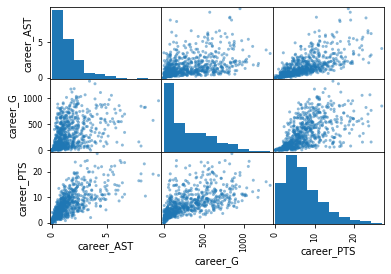

In [78]:
pd.plotting.scatter_matrix(nba_players)